In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

pevek ru
shimoda jp
husavik is
fairbanks us
avarua ck
tura ru
hilo us
taolanaro mg
east london za
hermanus za
ushuaia ar
krasnoselkup ru
dikson ru
pevek ru
east london za
hermanus za
longyearbyen sj
iqaluit ca
tiznit ma
kapaa us
westport ie
zavyalovo ru
arraial do cabo br
pali in
asau tv
tura ru
vaini to
chuy uy
avera pf
ushuaia ar
saleaula ws
ushuaia ar
bredasdorp za
mys shmidta ru
natchitoches us
abha sa
puerto del rosario es
isangel vu
mataura pf
fortuna us
busselton au
beringovskiy ru
tsihombe mg
sentyabrskiy ru
mirnyy ru
barrow us
loudeac fr
thompson ca
new norfolk au
attawapiskat ca
mar del plata ar
asfi ma
albany au
odienne ci
frumusita ro
provideniya ru
cayenne gf
carnarvon au
vaini to
sao felix do xingu br
poya nc
port augusta au
yulara au
talnakh ru
carnarvon au
tommot ru
albany au
busselton au
kapaa us
illoqqortoormiut gl
payakumbuh id
rikitea pf
ushuaia ar
punta arenas cl
hithadhoo mv
aguimes es
rikitea pf
upernavik gl
hermanus za
taolanaro mg
katsuura jp
lima pe
khash ir
v

ontario us
mirnyy ru
qinhuangdao cn
manacapuru br
hobart au
mar del plata ar
ushuaia ar
fayaoue nc
fortuna us
kuche cn
fallon us
mataura pf
kruisfontein za
rikitea pf
arraial do cabo br
busselton au
kaitangata nz
norman wells ca
whitehorse ca
dikson ru
hobart au
hermanus za
mys shmidta ru
lincoln us
hobart au
cape town za
hobart au
tiksi ru
cabo san lucas mx
flinders au
acari pe
albany au
praya id
tsihombe mg
albany au
alofi nu
berlevag no
castro cl
itoman jp
mataura pf
bredasdorp za
bilma ne
guerrero negro mx
ushuaia ar
nikolskoye ru
north vanlaiphai in
honiara sb
norman wells ca
albany au
hermanus za
hithadhoo mv
qaanaaq gl
kolyshley ru
gizo sb
jamestown sh
hami cn
puerto ayora ec
atuona pf
halalo wf
ushuaia ar
hermanus za
vigrestad no
huicungo pe
butaritari ki
lebu cl
ahuimanu us
qaanaaq gl
ushuaia ar
ushuaia ar
hithadhoo mv
hermanus za
bluff nz
arraial do cabo br
qaanaaq gl
illoqqortoormiut gl
rikitea pf
houma us
mataura pf
hobart au
cortazar mx
hasaki jp
jalu ly
cidreira br
illoqq

santa eulalia del rio es
port alfred za


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94a91564a2c4e6fc6596d6c52b6b17a0


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city.title())
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | husavik
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...Taolanaro
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | krasnoselkup
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | tiznit
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | zavyalovo
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | pali
Processing Record 22 of Set 1 | asau
Processing Record 23 of Set 1 | vaini
Processing Record 24 of Set 1 | chuy
Proces

Processing Record 34 of Set 4 | bumbuna
Processing Record 35 of Set 4 | kharan
Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | harer
Processing Record 38 of Set 4 | grand-santi
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | waipawa
Processing Record 42 of Set 4 | krasnyy yar
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | loubomo
Processing Record 46 of Set 4 | urumqi
Processing Record 47 of Set 4 | borgarnes
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | takoradi
Processing Record 50 of Set 4 | bentiu
Processing Record 1 of Set 5 | basco
Processing Record 2 of Set 5 | monrovia
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | soyo
Processing Record 5 of Set 5 | sawtell
Processing Record 6 of Set 5 | mersing
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | po

Processing Record 25 of Set 8 | zhigansk
Processing Record 26 of Set 8 | kerman
Processing Record 27 of Set 8 | moree
Processing Record 28 of Set 8 | viedma
Processing Record 29 of Set 8 | bur gabo
City not found. Skipping...Bur Gabo
Processing Record 30 of Set 8 | novyy urengoy
Processing Record 31 of Set 8 | taree
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | oussouye
Processing Record 34 of Set 8 | ixtapa
Processing Record 35 of Set 8 | friedeburg
Processing Record 36 of Set 8 | agropoli
Processing Record 37 of Set 8 | arauca
Processing Record 38 of Set 8 | luanda
Processing Record 39 of Set 8 | bedesa
Processing Record 40 of Set 8 | payo
Processing Record 41 of Set 8 | sumbawa
City not found. Skipping...Sumbawa
Processing Record 42 of Set 8 | usinsk
Processing Record 43 of Set 8 | svetlaya
Processing Record 44 of Set 8 | karangampel
Processing Record 45 of Set 8 | laramie
Processing Record 46 of Set 8 | ontario
Processing Record 47 of Set 8 | qinhuangda

Processing Record 8 of Set 12 | kalmunai
Processing Record 9 of Set 12 | lazurne
Processing Record 10 of Set 12 | kerema
Processing Record 11 of Set 12 | ilulissat
Processing Record 12 of Set 12 | xingyi
Processing Record 13 of Set 12 | santa isabel do rio negro
Processing Record 14 of Set 12 | ginir
Processing Record 15 of Set 12 | sao joao do paraiso
Processing Record 16 of Set 12 | constitucion
Processing Record 17 of Set 12 | kabare
Processing Record 18 of Set 12 | berdigestyakh
Processing Record 19 of Set 12 | saint-augustin
Processing Record 20 of Set 12 | aleksandrov gay
Processing Record 21 of Set 12 | yenagoa
Processing Record 22 of Set 12 | aksarka
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | ostrovnoy
Processing Record 25 of Set 12 | hazleton
Processing Record 26 of Set 12 | murray bridge
Processing Record 27 of Set 12 | vikhorevka
Processing Record 28 of Set 12 | araouane
Processing Record 29 of Set 12 | senanga
Processing Record 30 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,44.55,63,95,5.64,RU,2020-06-17 19:02:13
1,Shimoda,34.67,138.95,64.00,93,100,5.70,JP,2020-06-17 19:02:13
2,Husavik,66.04,-17.34,55.40,58,10,9.17,IS,2020-06-17 18:57:45
3,Fairbanks,64.84,-147.72,70.00,45,20,2.84,US,2020-06-17 19:00:02
4,Avarua,-21.21,-159.78,71.60,68,13,9.17,CK,2020-06-17 19:02:13
5,Tura,25.52,90.22,75.07,98,100,7.90,IN,2020-06-17 19:02:14
6,Hilo,19.73,-155.09,75.20,73,90,3.36,US,2020-06-17 19:02:14
7,East London,-33.02,27.91,62.20,75,0,13.49,ZA,2020-06-17 18:57:22
8,Hermanus,-34.42,19.23,61.74,49,0,5.59,ZA,2020-06-17 19:02:14
9,Ushuaia,-54.80,-68.30,39.20,69,40,0.89,AR,2020-06-17 18:58:54


In [11]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
307,Tezu,IN,2020-06-17 19:03:22,27.92,96.17,77.34,79,94,0.18
85,Khandyga,RU,2020-06-17 19:02:31,62.67,135.60,57.83,62,0,0.25
297,Ilebo,CD,2020-06-17 19:02:05,-4.32,20.58,70.66,42,87,0.25
99,Kawalu,ID,2020-06-17 19:02:34,-7.38,108.21,71.92,92,100,0.49
268,Nanlong,CN,2020-06-17 19:03:13,31.35,106.06,67.28,90,99,0.49
...,...,...,...,...,...,...,...,...,...
266,Saint-Joseph,RE,2020-06-17 19:03:13,-21.37,55.62,68.00,82,75,25.28
572,Grenville,GD,2020-06-17 19:04:21,12.12,-61.62,86.00,74,40,25.28
424,Khipro,PK,2020-06-17 19:03:49,25.83,69.38,90.25,52,100,25.43
284,Nouadhibou,MR,2020-06-17 19:03:17,20.93,-17.03,98.60,23,1,28.86


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/17/20'

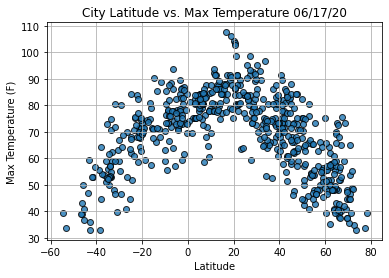

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

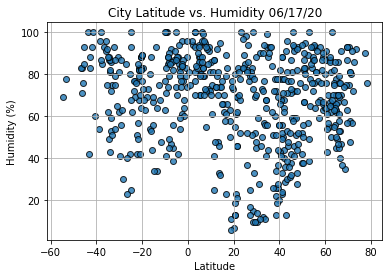

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

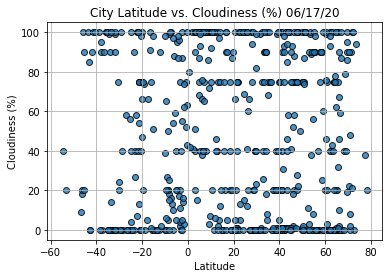

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

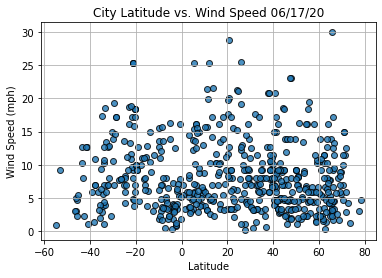

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)  
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Iqaluit
Country                        CA
Date          2020-06-17 19:02:15
Lat                         63.75
Lng                        -68.51
Max Temp                       41
Humidity                       65
Cloudiness                     75
Wind Speed                  12.75
Name: 13, dtype: object

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


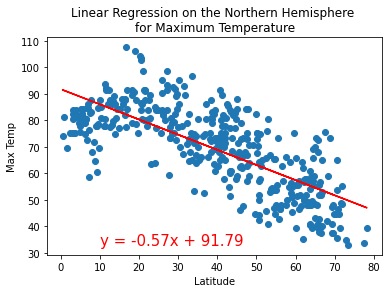

LinregressResult(slope=-0.5730041001152849, intercept=91.78501463080906, rvalue=-0.7423424316055217, pvalue=6.539448401227072e-72, stderr=0.025794589833462365)

In [52]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       + 'for Maximum Temperature', 'Max Temp',(10,33))

linregress(x_values, y_values)

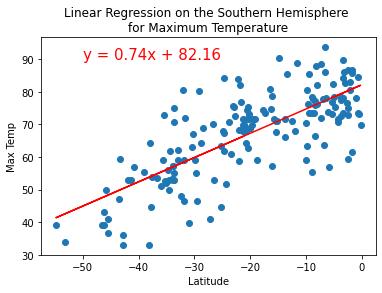

LinregressResult(slope=0.74427542386995, intercept=82.16194179474842, rvalue=0.7513545939420406, pvalue=3.828470654541377e-32, stderr=0.05043259955811089)

In [53]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       + 'for Maximum Temperature', 'Max Temp',(-50,90))
linregress(x_values, y_values)

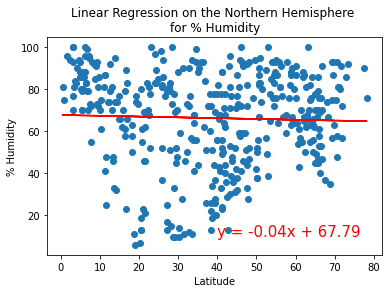

In [55]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        + 'for % Humidity', '% Humidity',(40,10))

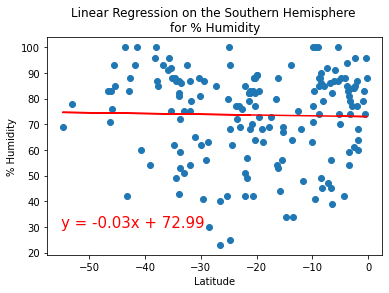

In [62]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        + 'for % Humidity', '% Humidity',(-55,30))

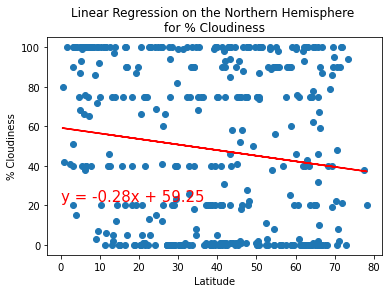

In [63]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        + 'for % Cloudiness', '% Cloudiness',(0,22))

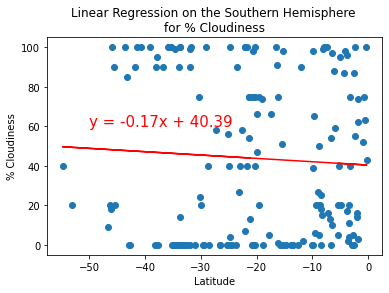

In [64]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        + 'for % Cloudiness', '% Cloudiness',(-50,60))

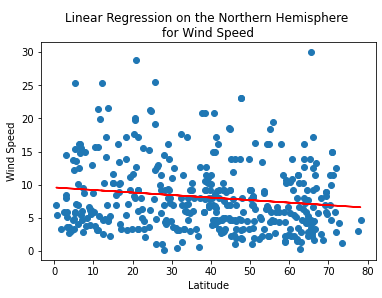

In [66]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        + 'for Wind Speed', 'Wind Speed',(40,35))

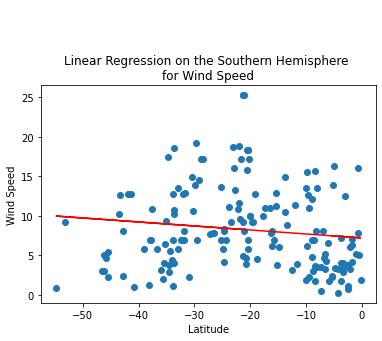

In [67]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        + 'for Wind Speed', 'Wind Speed',(-50,35))